# Practice stream function

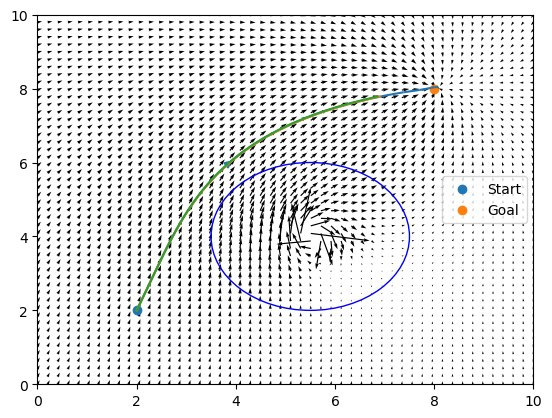

In [ ]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import potential_field_path as pf
importlib.reload(pf)
from scipy.interpolate import interp2d
from diff_flat import diff_flat
from quad_sim import simulate_traj

start = np.array([2,2])
goal = np.array([8,8])

safe_factor = 0.5
x = np.linspace(0,10, 50, dtype=np.float)
y = np.linspace(0,10, 50, dtype=np.float)
XX, YY = np.meshgrid(x,y)
xs, ys, U, V, tf = pf.potential_path(XX, YY, start, goal, obst_field, safe_factor)

fig, axs = plt.subplots()
for obstacles in obst_field:
    xc, yc, r = obstacles
    draw_obst = plt.Circle((xc, yc), r, color='b', fill=False, label="Obstacle")
    axs.add_artist(draw_obst)
axs.quiver(XX,YY,U,V)
axs.scatter(start[0], start[1], label="Start")
axs.scatter(goal[0], goal[1], label="Goal")
axs.streamplot(XX,YY,U,V,start_points=[start], integration_direction='forward')

axs.plot(xs, ys)
axs.set_xlim([0, 10])
axs.set_ylim([0, 10])
plt.legend()

z, u = diff_flat(xs, ys, tf)
z_traj = simulate_traj(z[:,0], u, tf/np.shape(u)[1])
axs.plot(z_traj[:,0], z_traj[:,1])
plt.show()
# time step should be exactly 1e-1... could that be the error? seems like it might something else too

### random obstacle field

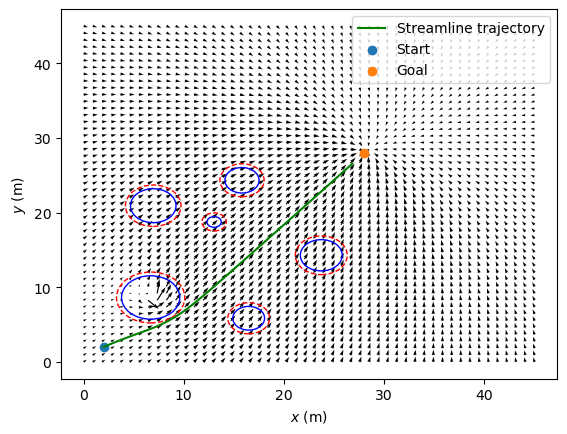

In [40]:

import importlib
import numpy as np
import matplotlib.pyplot as plt
import potential_field_path as pf
importlib.reload(pf)
from scipy.interpolate import interp2d
from create_obst_field import create_obst_field, recreate_obst_field
from diff_flat import diff_flat
from quad_sim import simulate_traj


start = np.array([2,2])
goal = np.array([28,28])
obst_field, obst_seeds = create_obst_field(num_obst=6, xlim=(5.5, 24.5), ylim=(5.5, 24.5), rlim=(0.5,3))
#obst_field = ((11.200888888363535, 21.597498080872896, 2.877339896578286), (22.36999109730139, 5.719864448809987, 1.790727574842865), (15.744432019089361, 13.741123146255644, 2.227910362247654), (9.080641446211343, 13.381474053249676, 1.9401265048719178), (9.937332836619788, 18.27324116189574, 0.5377995109334419))
# This is the obst_field used for plots in the paper
safe_factor = 0.5
x = np.linspace(0,45, 50, dtype=np.float)
y = np.linspace(0,45, 50, dtype=np.float)
XX, YY = np.meshgrid(x,y)
xs, ys, U, V, tf = pf.potential_path(XX, YY, start, goal, obst_field, safe_factor)

fig, axs = plt.subplots()
for obstacles in obst_field:
    xc, yc, r = obstacles
    draw_obst = plt.Circle((xc, yc), r, color='b', fill=False, label="Obstacle")
    axs.add_artist(draw_obst)
    draw_obst = plt.Circle((xc, yc), safe_factor + r, linestyle='dashed', color='r', fill=False, label="Saftey zone")
    axs.add_artist(draw_obst)
    
axs.quiver(XX,YY,U,V)
axs.scatter(start[0], start[1], label="Start")
axs.scatter(goal[0], goal[1], label="Goal")
# axs.streamplot(XX,YY,U,V,start_points=[start], integration_direction='forward')
axs.plot(xs, ys, label="Streamline trajectory", color="green")

z, u = diff_flat(xs, ys, tf)

dt = tf/np.shape(u)[1]
z_traj = simulate_traj(z[:,0], u, dt)
# axs.plot(z_traj[:,0], z_traj[:,1], label="Differentially flat recreated trajectory")
plt.legend(loc="upper right")
plt.xlabel(r"$x$ (m)")
plt.ylabel(r"$y$ (m)")
plt.show()

In [ ]:
print(obst_field)

((11.200888888363535, 21.597498080872896, 2.877339896578286), (22.36999109730139, 5.719864448809987, 1.790727574842865), (15.744432019089361, 13.741123146255644, 2.227910362247654), (9.080641446211343, 13.381474053249676, 1.9401265048719178), (9.937332836619788, 18.27324116189574, 0.5377995109334419))


In [ ]:
recreated_obst_field = recreate_obst_field(num_obst=5, xlim=(5, 25), ylim=(5, 25), rlim=(0.5,3), seed_list=obst_seeds)
# idk if this seeding idea is helpful, but kinda fun (probably not helpful). The right way to do it would've have been to make 1 seed per obstacle field and then
# just store a single number for the entire obstacle field, but saving the disctionaries as demonstrated below is easy enough


# This is how we could store the obstacle fields, and possibly even the streamlines/diff flat solution before the iLQR sims
# so we have a set of X randomly generated obstacles that we use for the sims
import numpy as np
field_dict = {}
field_dict[0] = obst_field
np.save("field_dict.npy", field_dict)

field_dict = np.load("field_dict.npy", allow_pickle='TRUE')
field_dict = field_dict.item()    # thhis is how you have to unpack the dict when using np.save()
field_dict

{0: ((11.88072766429801, 11.96646630209501, 2.2825398064155102),
  (6.198276607608731, 14.925195922030522, 2.392297324560871),
  (16.173550674834885, 22.271079950637933, 1.8168172237457867),
  (24.2629084605296, 20.73808831102412, 2.7488421820504265),
  (17.13765334970589, 15.096323263816211, 0.5280660257759086))}

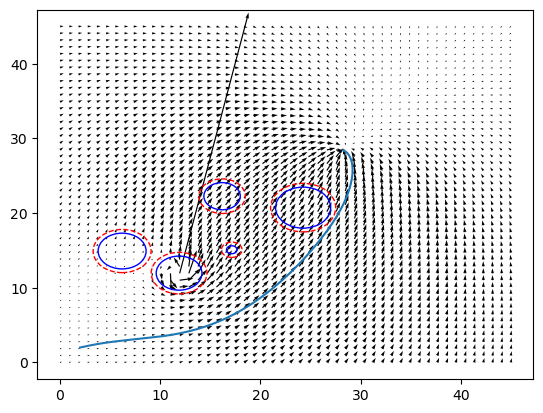

In [ ]:
fig, axs = plt.subplots()
for obstacles in obst_field:
    xc, yc, r = obstacles
    draw_obst = plt.Circle((xc, yc), r, color='b', fill=False, label="Obstacle")
    axs.add_artist(draw_obst)
    draw_obst = plt.Circle((xc, yc), safe_factor + r, linestyle='dashed', color='r', fill=False, label="Saftey zone")
    axs.add_artist(draw_obst)
axs.quiver(XX,YY,U,V)
#axs.streamplot(XX,YY,U,V,start_points=[start], integration_direction='forward')
axs.plot(xs, ys)

plt.show()

# iLQR warm

In [31]:

# The cell above must be run before this to create obst_field
import numpy as np
import importlib
import iLQR
importlib.reload(iLQR)
from iLQR import iLQR
import matplotlib.pyplot as plt

# Setup the iLQR problem
N = np.shape(u)[1] + 1
dt = dt
x_goal = np.hstack((goal, [0,0,0,0]));

# TODO: Adjust the costs as needed for convergence
Q = np.eye(6)
Qf = 1e3 * np.eye(6)
R = 1e-3 * np.eye(2)

ilqr = iLQR(x_goal, N, dt, Q, R, Qf, obst_field)
x_sol, u_sol, K_sol, cost = ilqr.calculate_optimal_trajectory(z.T, u.T)

  cost: 150291.65933869765
  cost: 1067036.8500339864
  cost: 1133002.181455021
  cost: 1197084.045839231
  cost: 1258805.3704699469
  cost: 1314603.250698424
  cost: 1371020.264974763
  cost: 1424239.3305197216
  cost: 1475974.8553504834
  cost: 1523971.178250657
  cost: 1580547.8736914685
  cost: 1621448.4884831307
  cost: 1663285.225780195
  cost: 1696066.5566498246
  cost: 1728724.0352728248
  cost: 1758968.6328466076
  cost: 1780733.1139018268
  cost: 1799863.5760359506
  cost: 1817740.869248672
  cost: 1825241.4299521449
  cost: 1836603.3637521155
  cost: 1845480.50273524
  cost: 1850660.485679437
  cost: 1853545.1440593677
  cost: 1853344.709099458
  cost: 1850508.5351221878
  cost: 1844850.4391033493
  cost: 1836470.2844796644
  cost: 1825367.8089911873
  cost: 1811610.7619785462
  cost: 1795256.3074150344
  cost: 1776386.0923307005
  cost: 1755118.0168301756
  cost: 1731593.0544086413
  cost: 1705965.7264653654
  cost: 1678408.9169924883
  cost: 1649099.7753090798
  cost: 1618

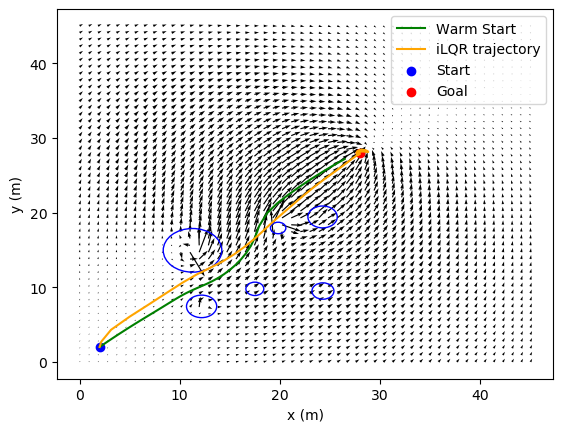

In [32]:

# Plot iLQR Warm solution
fig, axs = plt.subplots()
for obstacles in obst_field:
    xc, yc, r = obstacles
    draw_obst = plt.Circle((xc, yc), r, color='b', fill=False, label="Obstacle")
    axs.add_artist(draw_obst)
    # draw_obst = plt.Circle((xc, yc), safe_factor + r, linestyle='dashed', color='r', fill=False, label="Saftey zone")
    # axs.add_artist(draw_obst)
axs.quiver(XX,YY,U,V)
# axs.streamplot(XX,YY,U,V,start_points=[start], integration_direction='forward')
axs.plot(xs, ys, color='green', label="Warm Start")

xx = np.array(x_sol)
x0 = z[:,0]
axs.scatter(x0[0], x0[1], color='blue', label="Start")
axs.scatter(x_goal[0], x_goal[1], color='red', label="Goal")
axs.plot(xx[:,0], xx[:,1], color='orange', label="iLQR trajectory")
#plt.title('iLQR Trajectory Solution')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.show()

# iLQR Cold

In [9]:
# The cell above must be run before this to create obst_field
import numpy as np
import importlib
import iLQR
importlib.reload(iLQR)
from iLQR import iLQR

import matplotlib.pyplot as plt
obst_field=((11.200888888363535, 21.597498080872896, 2.877339896578286), (22.36999109730139, 5.719864448809987, 1.790727574842865), (15.744432019089361, 13.741123146255644, 2.227910362247654), (9.080641446211343, 13.381474053249676, 1.9401265048719178), (9.937332836619788, 18.27324116189574, 0.5377995109334419))

# Setup the iLQR problem
N = np.shape(u)[1] + 1

x_goal = np.hstack((goal, [0,0,0,0]));
x0 = np.hstack((start, [0,0,0,0]));
z_cold = np.linspace(x0, x_goal, N).T
u_cold = np.ones((2,N-1)) * 9.81/2

# TODO: Adjust the costs as needed for convergence
Q = np.eye(6)
Qf = 1e2 * np.eye(6)
R = 1e-3 * np.eye(2)

ilqr = iLQR(x_goal, N, dt, Q, R, Qf, obst_field)
x0 = z[:,0]
x_sol_cold, u_sol, K_sol, cost = ilqr.calculate_optimal_trajectory(z_cold.T, u_cold.T)

  cost: 22872.460000000006
  cost: 195201.50891750178
  cost: 189113.41595596867
  cost: 183357.06310371388
  cost: 177864.47947909526
  cost: 172601.60071210284
  cost: 167544.77124863563
  cost: 162675.57159737725
  cost: 157979.15227645653
  cost: 153443.6095986267
  cost: 149059.90704282833
  cost: 144822.53832800224
  cost: 140731.79598877399
  cost: 136800.0681498399
  cost: 133078.48832361354
  cost: 129968.72573944171
  cost: 126724.14745691077
  cost: 124330.75876464338
  cost: 121066.46396227535
  cost: 117825.29094890071
  cost: 115128.69674342698
  cost: 112099.23242508453
  cost: 109199.35649451311
  cost: 106279.84904345976
  cost: 103472.09000113216
  cost: 100753.08851433147
  cost: 97973.11388606246
  cost: 95380.66362132903
  cost: 92697.5480210638
  cost: 90148.56838949842
  cost: 87637.88326312625
  cost: 85213.54873119184
  cost: 82849.11742644824
  cost: 80551.85524839775
  cost: 78314.08943444489
  cost: 76135.56637875357
  cost: 74014.53607830434
  cost: 71950.2

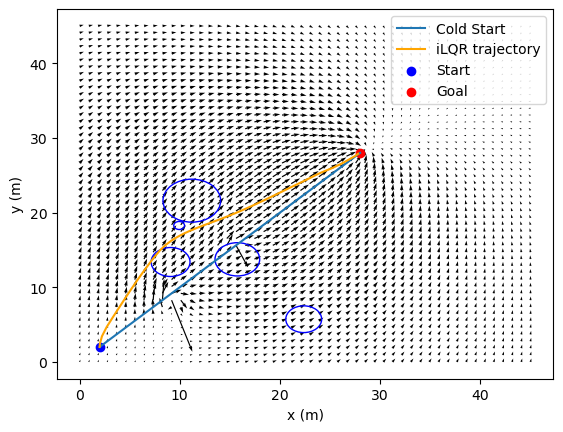

In [10]:

# Visualize the solution
fig, axs = plt.subplots()
for obstacles in obst_field:
    xc, yc, r = obstacles
    draw_obst = plt.Circle((xc, yc), r, color='b', fill=False, label="Obstacle")
    axs.add_artist(draw_obst)
    # draw_obst = plt.Circle((xc, yc), safe_factor + r, linestyle='dashed', color='r', fill=False, label="Saftey zone")
    # axs.add_artist(draw_obst)
axs.quiver(XX,YY,U,V)
axs.plot(z_cold[0,:], z_cold[1,:], label="Cold Start")

xx = np.array(x_sol_cold)
axs.scatter(x0[0], x0[1], color='blue', label="Start")
axs.scatter(x_goal[0], x_goal[1], color='red', label="Goal")
axs.plot(xx[:,0], xx[:,1], color="orange", label="iLQR trajectory")
#plt.title('iLQR Trajectory Solution')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()

plt.show()

In [44]:
# This is a new code cell to make the combined iLQR plot for the poster
import numpy as np
import importlib
import iLQR
importlib.reload(iLQR)
from iLQR import iLQR
import potential_field_path as pf
importlib.reload(pf)
from diff_flat import diff_flat

# Set up the field
x = np.linspace(0,45, 50, dtype=np.float)
y = np.linspace(0,45, 50, dtype=np.float)
obst_field = ((11.200888888363535, 21.597498080872896, 2.877339896578286), (22.36999109730139, 5.719864448809987, 1.790727574842865), (15.744432019089361, 13.741123146255644, 2.227910362247654), (9.080641446211343, 13.381474053249676, 1.9401265048719178), (9.937332836619788, 18.27324116189574, 0.5377995109334419))
XX, YY = np.meshgrid(x,y)

start = np.array([2,2])
goal = np.array([28,28])

# Warm start
# Calculate the streamline solution
safe_factor = 0.5
x0 = np.hstack((start, [0,0,0,0]));
x_goal = np.hstack((goal, [0,0,0,0]));
xs, ys, U, V, tf = pf.potential_path(XX, YY, start, goal, obst_field, safe_factor)
z_warm, u_warm = diff_flat(xs, ys, tf)

# Setup the iLQR problem
N = np.shape(u_warm)[1] + 1
dt = tf/np.shape(u_warm)[1]

# Calculate the cold start solution
z_cold = np.linspace(x0, x_goal, N).T
u_cold = np.ones((2,N-1)) * 9.81/2

# TODO: Adjust the costs as needed for convergence
Q = np.eye(6)
Qf = 1e3 * np.eye(6)
R = 1e-3 * np.eye(2)

ilqr = iLQR(x_goal, N, dt, Q, R, Qf, obst_field)
x_sol_warm, u_sol_warm, K_sol_warm, cost_warm = ilqr.calculate_optimal_trajectory(z_warm.T, u_warm.T)
x_sol_cold, u_sol_cold, K_sol_cold, cost_cold = ilqr.calculate_optimal_trajectory(z_cold.T, u_cold.T)

  cost: 132102.56467194506
  cost: 134194.07981110903
  cost: 129496.1386198054
  cost: 124983.59537483004
  cost: 120648.08414988604
  cost: 116482.28839432943
  cost: 112480.01441778845
  cost: 108636.06218621717
  cost: 104945.56052314673
  cost: 101402.57055964114
  cost: 97999.33146298857
  cost: 94727.97431231622
  cost: 91582.30702341246
  cost: 88557.53186898667
  cost: 85649.50008977587
  cost: 82854.35279502306
  cost: 80168.38136169623
  cost: 77587.94780547162
  cost: 75109.4257394629
  cost: 72729.16943443366
  cost: 70443.50592495353
  cost: 68248.73328483192
  cost: 66141.13173897265
  cost: 64117.00090829472
  cost: 62172.713038472066
  cost: 60304.76430313884
  cost: 58509.81590729373
  cost: 56784.72087432114
  cost: 55126.53343537736
  cost: 53532.502854724306
  cost: 52000.057755496906
  cost: 50526.78659514858
  cost: 49110.41737994904
  cost: 47748.79810915274
  cost: 46439.87908735345
  cost: 45181.698077220164
  cost: 43972.36872010733
  cost: 42810.07201370692


In [45]:
x_sol_warm = np.array(x_sol_warm)
x_sol_cold = np.array(x_sol_cold)

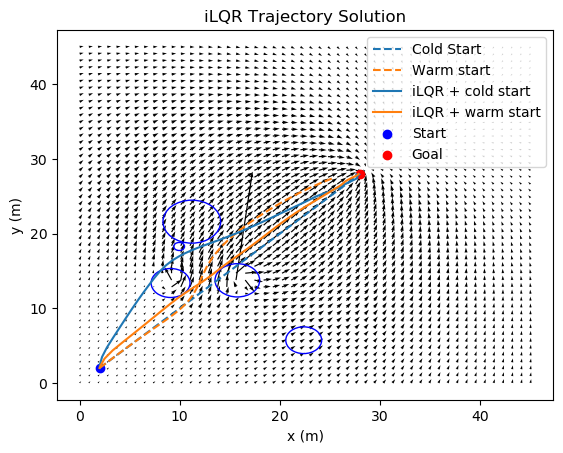

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the solution
fig, axs = plt.subplots()
for obstacles in obst_field:
    xc, yc, r = obstacles
    draw_obst = plt.Circle((xc, yc), r, color='b', fill=False, label="Obstacle")
    axs.add_artist(draw_obst)
    # draw_obst = plt.Circle((xc, yc), safe_factor + r, linestyle='dashed', color='r', fill=False, label="Saftey zone")
    # axs.add_artist(draw_obst)
axs.quiver(XX,YY,U,V)
axs.plot(z_cold[0,:], z_cold[1,:], color="#1f77b4", linestyle="--", label="Cold Start")

xx = np.array(x_sol_cold)
axs.scatter(x0[0], x0[1], color='blue', label="Start")
axs.scatter(x_goal[0], x_goal[1], color='red', label="Goal")
axs.plot(xs, ys, color="#ff7f0e", linestyle="--", label="Warm start")

axs.plot(x_sol_cold[:,0], x_sol_cold[:,1], color="#1f77b4", label="iLQR + cold start")
axs.plot(x_sol_warm[:,0], x_sol_warm[:,1], color="#ff7f0e", label="iLQR + warm start")
plt.title('iLQR Trajectory Solution')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f5f35f06-accf-4f8f-84f9-e35f4357802a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>